In [ ]:
import pandas as pd


In [ ]:
pip install openpyxl

In [ ]:
pip install xlrd

In [ ]:
df= pd.read_excel('mic2.xlsx', 
                  engine = 'openpyxl')
#df

In [ ]:
def custom_cls(x):
    if (0<= x <= 20):
        return '<= 20'
    elif (21 <=x<=30):
        return '21-30'
    elif(31<=x<=40):
        return '31-40'
    else:
        return '>40'

In [ ]:
df['AgeGP'] = df.apply(lambda tbl: custom_cls(tbl['Age']),
                       axis=1)
#df.head()

In [ ]:
age_gender = df.groupby(['AgeGP', 'Sex']).size()
age_gender = age_gender.to_frame()
age_gender

0
AgeGP Sex       
21-30 Female  11
      Male    20
31-40 Female   4
      Male     1
<= 20 Female   5
      Male     6
>40   Female   2
      Male     1

In [ ]:
age_sex = pd.pivot_table(index = ['AgeGP','Sex'],
                         aggfunc = len,
                         values = 'Availability',
                         data = df,
                         margins = True)
age_sex

Availability
AgeGP Sex                 
21-30 Female            11
      Male              20
31-40 Female             4
      Male               1
<= 20 Female             5
      Male               6
>40   Female             2
      Male               1
All                     50

In [ ]:
age_gender = age_gender.rename(columns = {0:'Count'})
age_gender = age_gender.reset_index()
age_gender.columns

Index(['AgeGP', 'Sex', 'Count'], dtype='object')

In [ ]:
x = age_gender.iloc[:,-1].sum()
x

age_gender['%'] = (age_gender.iloc[:,-1]/x)*100
age_gender

,AgeGP,Sex,Count,%
0,21-30,Female,11,22.0
1,21-30,Male,20,40.0
2,31-40,Female,4,8.0
3,31-40,Male,1,2.0
4,<= 20,Female,5,10.0
5,<= 20,Male,6,12.0
6,>40,Female,2,4.0
7,>40,Male,1,2.0


In [ ]:
plot_order = ['<= 20','21-30','31-40','>40']

In [ ]:
import seaborn as sns

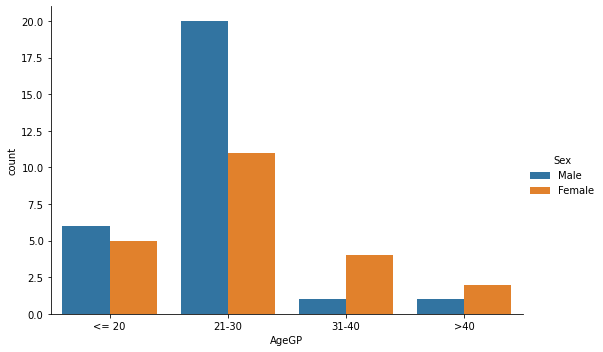

In [ ]:
g = sns.catplot(x = 'AgeGP',
                kind = 'count',
                data = df,
                hue = 'Sex',
               order = plot_order,
               height = 5,
               aspect = 1.5)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
fig = px.sunburst(age_gender,
                  values = 'Count',
                  path = ['Sex','Count', 'AgeGP','%'],
                  color = 'AgeGP',
                  title = 'Number of respondent by age group and gender'
                  )
plt.savefig('sample_data/age_groupSun.png')
fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
figg = px.sunburst(age_gender,
                  values = 'Count',
                  path = ['Count', 'AgeGP','%'],
                  color = 'AgeGP',
                  title = 'Number of respandondent by age and group'
                  )
plt.savefig('sample_data/age_groupSun.png')
fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
pip install dash

     |████████████████████████████████| 9.6 MB 10.0 MB/s 
     |████████████████████████████████| 357 kB 57.9 MB/s 


In [ ]:
import dash

In [ ]:
from dash import html

In [ ]:
from dash import dcc

In [ ]:
import dash_html_components as html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [ ]:
pip install jupyter_dash

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=f64b9e056e2aaa546ac39a2e11524ef202ccc48ed31f542833d48b8f3fe0ba7d
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
from jupyter_dash import JupyterDash

In [ ]:
p2 = JupyterDash(__name__)
p2.layout = html.Div(children=[html.H1('Title', 
                                       ),
dcc.Graph(figure=fig),
dcc.Graph(figure=figg),
]
)
if __name__ == '__main__':
  p2.run_server(host = 'localhost')

Dash app running on:


<IPython.core.display.Javascript object>